<a href="https://colab.research.google.com/github/PhaTanVu/AI_W9_31-03/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Khai bao thu vien cho toan bai
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

In [2]:
#Load data
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train.shape
x_test.shape

169001437/169001437 [==============================] - 2s 0us/step


(10000, 32, 32, 3)

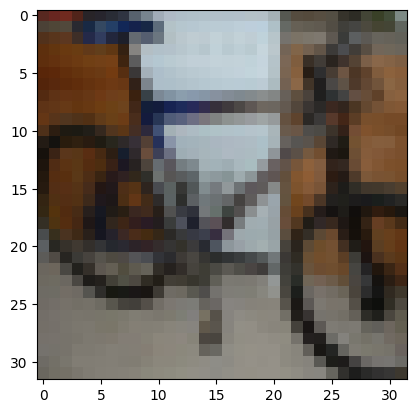

Nay la: [59]


In [3]:
# display an image from the dataset
import matplotlib.pyplot as plt
hinh = x_train[30]
plt.imshow(hinh, cmap=plt.cm.binary)
plt.show()
print('Nay la:', y_train[21])

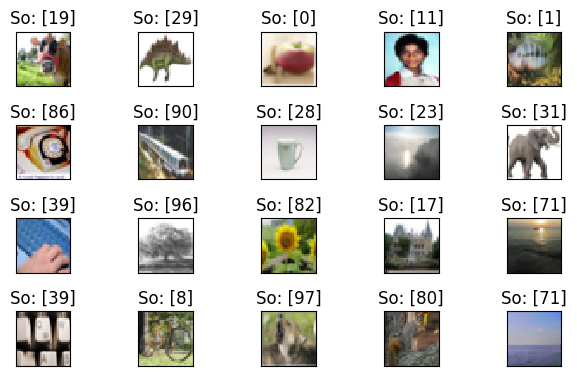

In [7]:
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap = 'gray', interpolation='none')
  plt.title('So: {}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [8]:
# preprocess the data
from keras.utils import to_categorical
x_train = x_train.reshape((50000, 32 * 32 * 3))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 32 * 32 * 3))
x_test = x_test.astype('float32') / 255


y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [9]:
# add a virtual layer to the input shape
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(2000, input_shape=(32*32*3,), activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2000)              6146000   
                                                                 
 dense_1 (Dense)             (None, 100)               200100    
                                                                 
Total params: 6,346,100
Trainable params: 6,346,100
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras.losses import categorical_crossentropy

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=128)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy:', test_acc)
print('test loss:', test_loss)

Epoch 1/10
391/391 [==============================] - 33s 82ms/step - loss: 4.4753 - accuracy: 0.0697
Epoch 2/10
391/391 [==============================] - 32s 82ms/step - loss: 3.7493 - accuracy: 0.1317
Epoch 3/10
391/391 [==============================] - 31s 79ms/step - loss: 3.5905 - accuracy: 0.1627
Epoch 4/10
391/391 [==============================] - 32s 83ms/step - loss: 3.4949 - accuracy: 0.1790
Epoch 5/10
391/391 [==============================] - 31s 81ms/step - loss: 3.4267 - accuracy: 0.1924
Epoch 6/10
391/391 [==============================] - 32s 82ms/step - loss: 3.3663 - accuracy: 0.2044
Epoch 7/10
391/391 [==============================] - 32s 83ms/step - loss: 3.3150 - accuracy: 0.2153
Epoch 8/10
391/391 [==============================] - 32s 81ms/step - loss: 3.2674 - accuracy: 0.2227
Epoch 9/10
391/391 [==============================] - 32s 82ms/step - loss: 3.2291 - accuracy: 0.2282
Epoch 10/10
313/313 [==============================] - 4s 11ms/step - loss: 3.5447

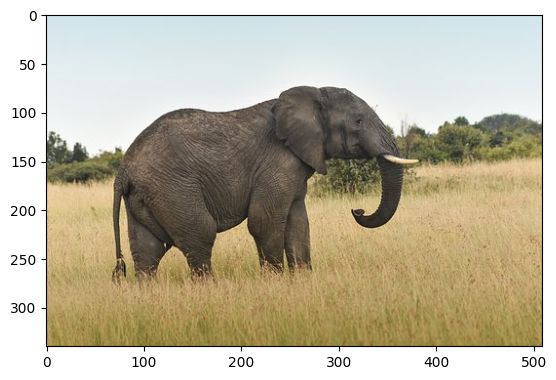

In [14]:
img = plt.imread('/content/convoi.jpg')
plt.imshow(img)
plt.show()

In [16]:
model.save('/content/test1.h6')

1/1 [==============================] - 0s 73ms/step


array([19])

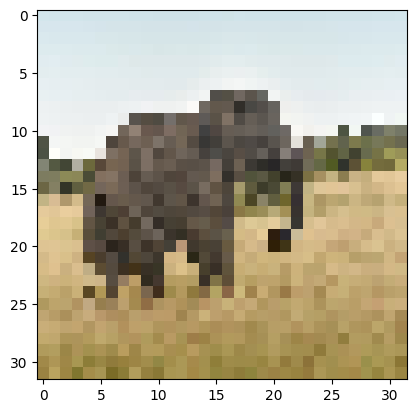

In [17]:
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
import numpy as np
img = load_img('/content/convoi.jpg',target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)